# meaningful quartile values from discrete data

attempt at figuring out a meaningful value for quartiles of data when that data consists of whole numbers better suited for buckets in a histogram than a smooth, continuous distribution.

0.25 quartile value: 5.07465066829
0.5 quartile value: 6.39215686275
0.75 quartile value: 7.73546561482


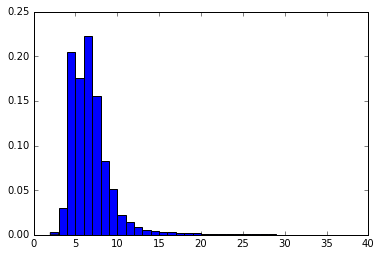

In [17]:
# histogram stuff!

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data
df = pd.read_csv('data.csv', header=None)

# convert to list
data = list(df[0])

# find max/min values
d_min = min(data)
d_max = max(data)

# generate normalized histogram of relative frequencies
y, x = np.histogram(data, bins=(d_max-d_min), normed=True)


# iterate through bin values to determine which bucket contains the particular threshold
for lim in [0.25, 0.5, 0.75]:
    
    r = 0
    idx = 0
    while r + y[idx] < lim:
        r += y[idx]
        idx += 1
    threshold_bucket_value = y[idx]
    val = x[idx]

    # compute relative percentage of that bucket before which the quartile piece occurs
    diff = lim - r
    diff_pct = diff/threshold_bucket_value

    # output bucket value plus its 3rd quartile percentage sliver
    print '{0} quartile value: {1}'.format(lim, diff_pct + val)

# plot stuff
plt.hist(data, normed=True, bins=(d_max-d_min))
plt.show()